### Data Cleaning and Feature Engineering

#### Objectives:
* Confirming missing values or placeholders in the dataset
* Droping irrelavent columns
* Feature engineering to create new columns
* Ascertaining if data transformation is required

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)});
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px


In [2]:
# Import data
data = pd.read_csv ('CSV/data.csv')
# print data shape
print (data.shape )
# print firt five rows
data.head ()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# The dataset has 21 columns and 3333 observations

In [4]:
# checking column datatypes, placeholders, and null values
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

* The dataset contains data inform of integers, float, object, and booleans

In [5]:
# Making the column_names python friendly
data.columns = data.columns.str.replace(" ", "_")
data.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

##### Check Missing Values


In [6]:
data.isna().sum ()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

#### Check Duplicates

In [7]:
data.duplicated ().sum ()

0

No duplicates

In [8]:
# Check for placeholder values
for col in data.columns:
    print(col)
    print(data[col].unique())
    print('\n-----------------------------------------------\n')

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

-----------------------------------------------

account_length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186

[ 3  5  7  6  4  2  9 19  1 10 15  8 11  0 12 13 18 14 16 20 17]

-----------------------------------------------

total_intl_charge
[2.7  3.7  3.29 1.78 2.73 1.7  2.03 1.92 2.35 3.02 3.43 2.46 3.32 3.54
 1.46 3.73 2.19 3.51 2.86 1.54 2.57 2.08 2.78 4.19 3.97 3.   3.83 3.4
 3.19 2.24 3.92 2.84 2.54 3.94 2.48 0.95 2.3  3.56 2.   2.38 2.97 2.11
 1.84 3.08 2.51 2.62 2.75 2.16 1.57 3.27 3.24 3.13 2.21 1.67 1.97 1.65
 3.16 4.05 2.65 3.35 2.32 2.94 3.75 2.4  2.13 1.43 1.19 3.38 3.05 2.43
 2.59 3.59 5.4  1.94 1.73 3.81 3.86 1.86 3.11 4.27 3.46 4.37 0.   3.21
 2.67 2.27 2.92 3.62 2.89 4.75 1.27 0.73 3.65 3.48 3.89 2.81 1.81 4.16
 1.22 1.76 4.21 1.59 5.1  2.05 1.35 1.89 3.78 4.86 4.32 4.   1.   0.54
 1.3  4.13 1.62 3.67 4.64 4.73 1.51 4.91 0.97 4.46 1.24 1.38 1.11 4.4
 4.02 4.43 4.51 0.35 4.1  4.08 4.29 1.49 4.35 1.08 4.56 1.4  1.13 4.24
 4.59 1.05 1.03 0.59 4.62 1.32 4.83 4.67 4.97 4.81 1.16 0.78 0.84 0.89
 0.7  0.92 0.3  4.94 4.48 0.57 0.65 0.68]

---------------------------------------------

#### Drop columns

In [9]:
data.drop(columns='phone_number', inplace = True)
data.head ()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
data. describe ()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Convert columns dtype from Object / bool to int

In [11]:
data['international_plan'] = data['international_plan'].replace('yes', 1)
data['international_plan'] = data['international_plan'].replace('no', 0)
data['voice_mail_plan'] = data['voice_mail_plan'].replace('yes', 1)
data['voice_mail_plan'] = data['voice_mail_plan'].replace('no', 0)

In [12]:
data.churn.replace((True, False), (1, 0), inplace = True)


In [13]:
data.head ()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Feature Engineering


#### Feature Engineering

In [14]:
#Add total_charge column containing sum of all customer charge
data['total_charge'] = round(data['total_day_charge'] + data['total_eve_charge']
                                  + data['total_night_charge'] + data['total_intl_charge'])
# Add total_calls column containing all calls made by customers except customer service calls
data['total_calls'] = round(data['total_day_calls'] + data['total_eve_calls']
                                  + data['total_night_calls'] + data['total_intl_calls'])
# Add total_minutes column containing all minutes spend by a customer
data['total_minutes'] = round(data['total_day_minutes'] + data['total_eve_minutes'] 
                                  + data['total_night_minutes'] + data['total_intl_minutes'])
data.head ()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_charge,total_calls,total_minutes
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,0,76.0,303,717.0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,0,59.0,332,625.0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,0,62.0,333,539.0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,0,67.0,255,565.0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,0,52.0,359,512.0


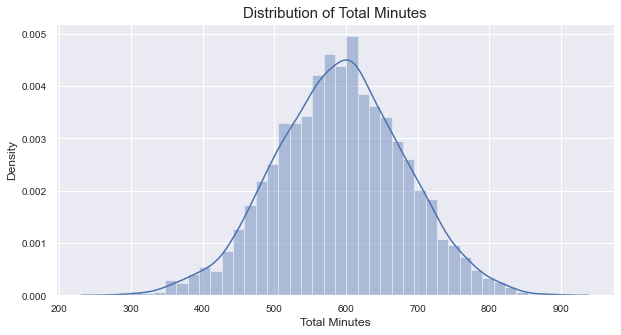

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Distribution of Total Minutes', fontsize = 15)
sns.distplot(data['total_minutes'], ax = ax)
ax.tick_params(axis = 'both', labelsize = 10)
plt.xlabel('Total Minutes', fontsize = 12)
plt.show()

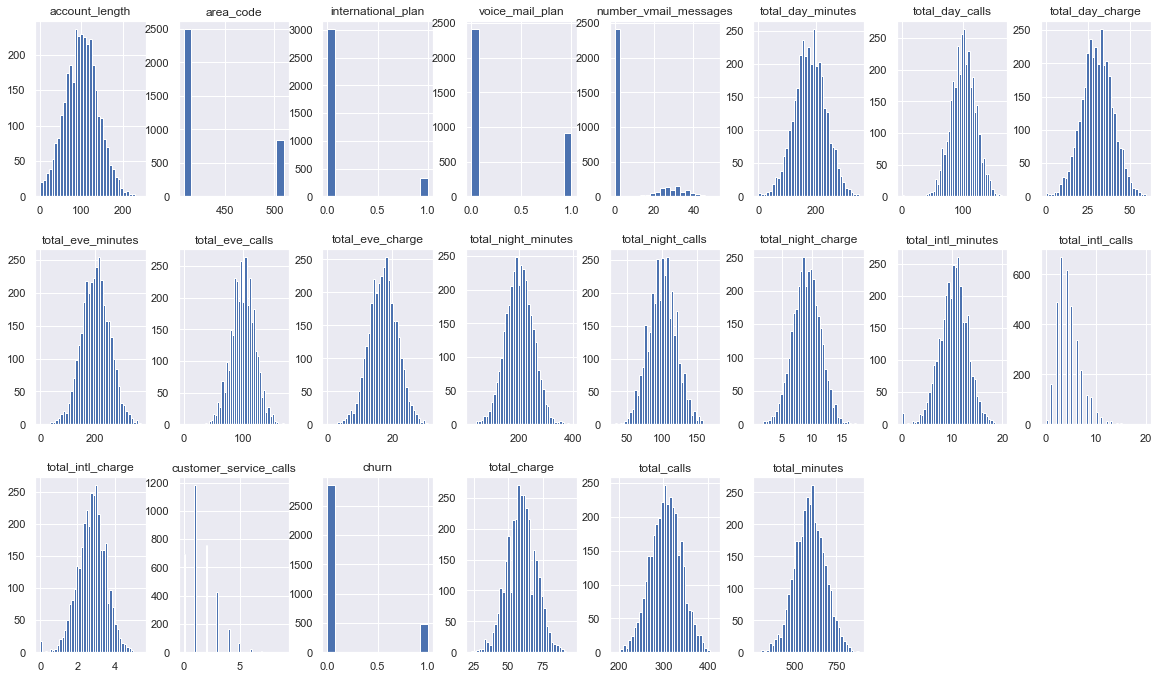

In [16]:
data.hist(bins='auto', layout=(5,8), figsize = (20,20));
# Most of our data is normally distributed


In [17]:
# Saved the Data for Exploratory Data Analysis
data.to_csv('CSV/data_cleaned.csv')